In [1]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from sklearn.model_selection import train_test_split

#################    Read data from CSV file   #################
df=pd.read_csv('cleveland.csv')
df.head()

,Age,Sex,CP,Trestbpss,Chol,Fbs,Restecg,Thalach,Oldpeak,Exang,Slope,Ca,Thal,Num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [2]:
# Creating the class column for binary classification
df['Class']=df['Num'].apply(lambda x: 1 if x>=1 else 0)
# removing the "Num" column since we are doing a binary classification in the first step because our label col. is called class
df=df.drop(['Num'], axis=1)
df

,Age,Sex,CP,Trestbpss,Chol,Fbs,Restecg,Thalach,Oldpeak,Exang,Slope,Ca,Thal,Class
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [ ]:
print("There is {} missing values in data frame".format(df.isnull().sum().sum()))

There is 0 missing values in data frame


In [3]:
#Convert float values into integer
float_col = df.select_dtypes(include=['float64']) 
list(float_col.columns.values)
for col in float_col.columns.values:
   df[col] = df[col].astype('int64')

# Convert categorical features to numerical
df['Ca'] =df['Ca'].astype('category').cat.codes
df['Thal'] =df['Thal'].astype('category').cat.codes

The Significant Value of the Features
Feature: 0, Score: 60.184
Feature: 1, Score: 0.894
Feature: 2, Score: 53.417
Feature: 3, Score: 56.646
Feature: 4, Score: 5.507
Feature: 5, Score: 53.968
Feature: 6, Score: 62.010
Feature: 7, Score: 67.296
Feature: 8, Score: 4.384
Feature: 9, Score: 53.826
Feature: 10, Score: 58.118
Feature: 11, Score: 98.718
Feature: 12, Score: 47.152


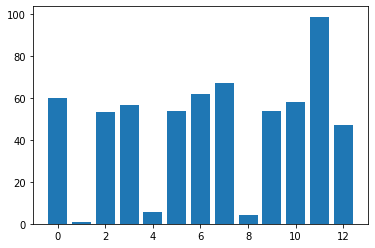

In [4]:
#Calculate The Significant Value of the Features
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

X, y = make_regression(n_samples=303, n_features=13, n_informative=13, random_state=1)
model = LinearRegression()
model.fit(X, y) # fit the model

importance = model.coef_   # get importance
#summarize feature importance
#Feature=['Age',	'Sex',	'CP'	,'Trestbpss',	'Chol',	'Fbs',	'Restecg',	'Thalach'	,'Oldpeak'	,'Exang'	,'Slope'	,'Ca','Thal','Class']
print("The Significant Value of the Features")
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.3f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [5]:
#remove the colums with low significant value score, here we have'Sex'=0.894, 'Chol'=5.507 ,and 'Oldpeak' =4.384
df=df.drop(['Sex','Chol','Oldpeak'],axis=1)
df

,Age,CP,Trestbpss,Fbs,Restecg,Thalach,Exang,Slope,Ca,Thal,Class
0,63,1,145,1,2,150,2,3,0,1,0
1,67,4,160,0,2,108,1,2,3,0,1
2,67,4,120,0,2,129,2,2,2,2,1
3,37,3,130,0,0,187,3,3,0,0,0
4,41,2,130,0,2,172,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,110,0,0,132,1,2,0,2,1
299,68,4,144,1,0,141,3,2,2,2,1
300,57,4,130,0,0,115,1,2,1,2,1
301,57,2,130,0,2,174,0,2,1,0,1


In [6]:
# Normalization: Scale the dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
min_max_scaler = preprocessing.MinMaxScaler()
df_scale= preprocessing.MinMaxScaler().fit_transform(df)
df_scale=pd.DataFrame(df_scale, columns=['Age','CP','Trestbpss','Fbs','Restecg','Thalach','Exang'	,'Slope'	,'Ca','Thal','Class'])

In [ ]:
#df_scale.to_csv('cleveland_clean.csv')

In [7]:
# Separate the target from the data set
X = df_scale.drop(['Class'], axis=1)
y = df_scale['Class'] 

In [8]:
#Split the data to training 70% and testing 30%
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [9]:
############################## The Neural Network Model ##########################################
model = keras.Sequential([ keras.layers.Dense(75, activation=tf.nn.relu, input_shape=(10,)), keras.layers.Dense(1, activation=tf.nn.sigmoid)])
model.compile(
    optimizer='adam',
    loss='mse',
    #metrics=[tf.keras.metrics.MeanAbsoluteError()])
    #metrics=[tf.keras.metrics.CosineSimilarity(axis=1)])
    metrics=['accuracy'])
history=model.fit(X_train, y_train, batch_size=32, epochs=100)
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Accuracy: %.4f' % test_acc, '\n')

Epoch 1/100
7/7 [==============================] - 0s 2ms/step - loss: 0.2460 - accuracy: 0.6038
Epoch 2/100
7/7 [==============================] - 0s 1ms/step - loss: 0.2393 - accuracy: 0.7028
Epoch 3/100
7/7 [==============================] - 0s 1ms/step - loss: 0.2338 - accuracy: 0.7358
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 0.2278 - accuracy: 0.7594
Epoch 5/100
7/7 [==============================] - 0s 1ms/step - loss: 0.2216 - accuracy: 0.7830
Epoch 6/100
7/7 [==============================] - 0s 1ms/step - loss: 0.2154 - accuracy: 0.7736
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 0.2091 - accuracy: 0.7830
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: 0.2024 - accuracy: 0.7972
Epoch 9/100
7/7 [==============================] - 0s 2ms/step - loss: 0.1964 - accuracy: 0.8066
Epoch 10/100
7/7 [==============================] - 0s 2ms/step - loss: 0.1896 - accuracy: 0.8160
Epoch 11/100
7/7 [===========

# **Evaluation Metrics**

In [15]:
# Recall, F1-Score, Precision
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report
givenDec = lambda gdVal: float('%.3f' % gdVal) # 1 digit
mlp=MLPClassifier(solver='adam', learning_rate_init = 0.0005, learning_rate = 'adaptive', activation="relu", max_iter=2000, random_state=42)

def evaluate_results(gtestLabels, gTestPred):
    d_accuracy = round(accuracy_score(gtestLabels, gTestPred), 4)
    v_recall = np.round(recall_score(gtestLabels, gTestPred, average = None), 4)
    v_prec = np.round(precision_score(gtestLabels, gTestPred, average = None), 4)
    
    d_recallAvg = np.round(recall_score(gtestLabels, gTestPred, average = 'weighted'), 4)
    d_precAvg = np.round(precision_score(gtestLabels, gTestPred, average = 'weighted'), 4)
    v_summaryReport = classification_report(gtestLabels, gTestPred, digits = 4)

    print('\n')
    print(v_summaryReport)

model = mlp.fit(X_train, y_train)
test_predictions = model.predict(X_test)
evaluate_results(y_test, test_predictions)



              precision    recall  f1-score   support

         0.0     0.8000    0.8627    0.8302        51
         1.0     0.8056    0.7250    0.7632        40

    accuracy                         0.8022        91
   macro avg     0.8028    0.7939    0.7967        91
weighted avg     0.8024    0.8022    0.8007        91



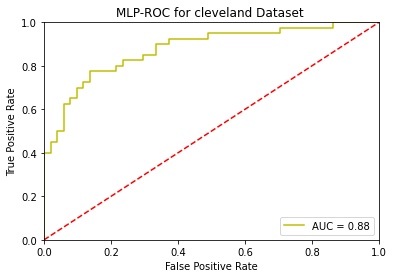

In [18]:
##### ROC ######################
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from inspect import signature
from sklearn.neural_network import MLPClassifier

mlp.fit(X_train, y_train)
probs = mlp.predict_proba(X_test)

malignant_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, malignant_probs)
roc_auc = auc(fpr, tpr)

plt.title('MLP-ROC for cleveland Dataset ')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()